# TP Final Inteligencia Artificial
###1er bimestre 2022
###Realizado por Anahi Bazet, Carlos Massobrio y Lionel Gutierrez

##Objetivos:
Tomando el dataset de "Possum Regression" de Kaggle (https://www.kaggle.com/datasets/abrambeyer/openintro-possum), se debe analizar el dataset y aplicar al mismo 2 modelos de clasificacion y 2 modelos de regresion:



*   Para los modelos de clasficiacion se debe clasificar el sexo de los animales en masculino y femenino
*   Para los modelos de regresion se debe precedir el valor de totlngth



In [78]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de dataset / analisis / preprocesamiento / separacion en split / test pada cada tipo de problema

## Carga de los datos (dataset)

In [79]:
#from google.colab import drive
#drive.mount('/content/drive')
dataset = pd.read_csv('possum.csv')
#dataset = pd.read_csv("/content/possum.csv",delimiter=',')



## Analisis básico del juego de datos

* Imprimir las primeras filas del dataset
* Imprimir las ultimas filas del dataset
* Imprimir los tipos de datos de cada columna

In [80]:
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [81]:
dataset.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [83]:
dataset.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


## Analizamos los nans del dataset

In [84]:
dataset.isnull().any()

case        False
site        False
Pop         False
sex         False
age          True
hdlngth     False
skullw      False
totlngth    False
taill       False
footlgth     True
earconch    False
eye         False
chest       False
belly       False
dtype: bool

In [85]:
nans = dataset.loc[dataset.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape[0]))

not_nans = dataset.loc[dataset.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape[0]))

Cantidad de filas con nans 3
Cantidad de filas sin nans 101


## Ajustamos los datos que son strings (binary encoding)

### Binary encoding: el campo sex lo convertimos a valores 0 (masculino) y 1 (femenino).

In [86]:
dataset['female'] = dataset.sex.apply(lambda label: 0 if (label == "m") else 1)

### Binary encoding: el campo Pop lo convertimos a valores 0 (other) y 1 (Victoria).

In [87]:
dataset['live_victoria'] = dataset.Pop.apply(lambda label: 1 if (label == "Vic") else 0)

pop es lugar donde se encontró: Victoria u otro  (New South Wales o Queensland)


## Analizamos el dataset ajustado

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   case           104 non-null    int64  
 1   site           104 non-null    int64  
 2   Pop            104 non-null    object 
 3   sex            104 non-null    object 
 4   age            102 non-null    float64
 5   hdlngth        104 non-null    float64
 6   skullw         104 non-null    float64
 7   totlngth       104 non-null    float64
 8   taill          104 non-null    float64
 9   footlgth       103 non-null    float64
 10  earconch       104 non-null    float64
 11  eye            104 non-null    float64
 12  chest          104 non-null    float64
 13  belly          104 non-null    float64
 14  female         104 non-null    int64  
 15  live_victoria  104 non-null    int64  
dtypes: float64(10), int64(4), object(2)
memory usage: 13.1+ KB


## Quitamos la feature de Pop y sex que abrimos en dos y analizamos el dataset ajustado

In [89]:
dataset = dataset.drop(columns=["Pop","sex","case"])
#Pop convertida en live_victoria
#sex convertido en female
#case es el numero de muestra, no es informacion util

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           104 non-null    int64  
 1   age            102 non-null    float64
 2   hdlngth        104 non-null    float64
 3   skullw         104 non-null    float64
 4   totlngth       104 non-null    float64
 5   taill          104 non-null    float64
 6   footlgth       103 non-null    float64
 7   earconch       104 non-null    float64
 8   eye            104 non-null    float64
 9   chest          104 non-null    float64
 10  belly          104 non-null    float64
 11  female         104 non-null    int64  
 12  live_victoria  104 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 10.7 KB


### Vemos correlacion de los datos

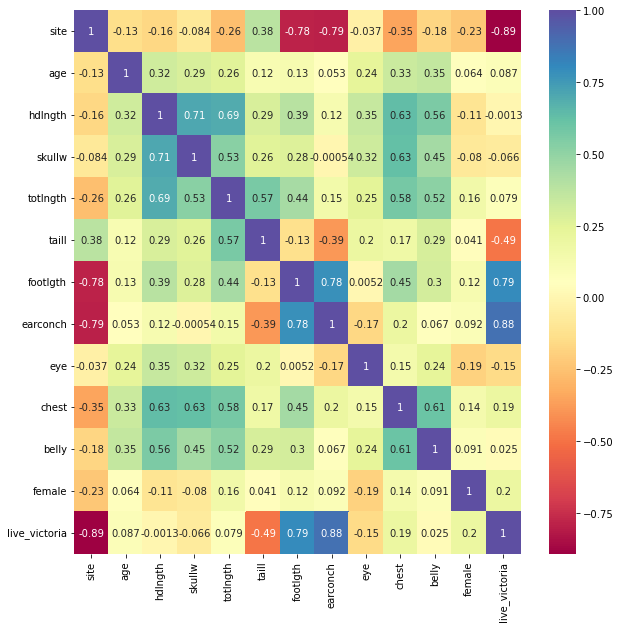

In [91]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), annot = True, cmap = 'Spectral')

## Pasamos el dataset a numpy para trabajarlo

In [92]:
datasetNumpy = pd.DataFrame.to_numpy(dataset,dtype="float")
datasetNumpy_cols = np.array(dataset.columns)

In [93]:
datasetNumpy_cols

array(['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'female',
       'live_victoria'], dtype=object)

## Vemos si el dataset tienen Nans y reemplazamos los mismos por las medias de las features

Reemplazamos los nans por la media, porque da mejores resultados que eliminar las filas y columnas con nans

In [94]:
print("Cantidad de nans del dataset: ",np.isnan(datasetNumpy).sum())
np.isnan(datasetNumpy).sum(axis=0)

Cantidad de nans del dataset:  3


array([0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [95]:
class CleanNaN:
    
  def colMeanNans(self,X):
    col_mean = np.nanmean(X, axis=0)
    return np.where(np.isnan(X), col_mean, X)

  def removerNans(self,X):
    filtroFilas = ~(np.isnan(X).any(axis=1))
    X = X[filtroFilas]
    return X        

In [96]:
cleanNans = CleanNaN()
#Eliminamos los nans
datasetNumpy = cleanNans.colMeanNans(datasetNumpy)

In [97]:
print("EL numero de nans luego de eliminarlos es: ",np.isnan(datasetNumpy).sum())

EL numero de nans luego de eliminarlos es:  0


### Separamos el dataset en train y test

In [98]:
class SplitDataset:

  def split(self,dataset,seed=18):
      '''Dado un dataset, permuta el mismo y lo divie en 2 dataset nuevos con el 70%, 30% de los datos
        Devuelve:
              train_set: 70% de los datos
              test_set: 30% de los datos
      '''        
      train_set,test_set = np.split(np.random.RandomState(seed=seed).permutation(dataset),[int(0.7*len(dataset))])
      return train_set,test_set

In [99]:
RANDOM_STATE = 10
split_DS = SplitDataset()
train_set, test_set = split_DS.split(datasetNumpy,RANDOM_STATE)

In [100]:
print("Shape de mi dataset de train: ",train_set.shape)
print("Shape de mi dataset de test: ",test_set.shape)

Shape de mi dataset de train:  (72, 13)
Shape de mi dataset de test:  (32, 13)


### Cargamos clases que utilizaremos posteriormente

In [101]:
class MetricaBase():
    '''Clase base para las metricas. La misma guarda los parametros necesarios para cada metrica a calcular'''
    def __init__(self,**kwargs):
        self._parametros = kwargs

    def __call__(self, *args, **kwargs):
        pass        

class Precision(MetricaBase):
    '''Clase para el calculo de la metrica Precision'''
    def __init___(self,**kwargs):
        MetricaBase.__init__(self,**kwargs)
    
    def __call__(self):
        if "truth" in self._parametros and "prediction" in self._parametros:
            truth = self._parametros["truth"]
            prediction = self._parametros["prediction"]
            TP = ((truth == 1 ) & (prediction == 1)).sum()
            FP = ((truth == 0 ) & (prediction == 1)).sum()
            Precision = TP / (TP+FP)
            return (Precision)
        return None    

class Recall(MetricaBase):
    '''Clase para el calculo de la metrica Recall'''
    def __init___(self,**kwargs):
        MetricaBase.__init__(self,**kwargs)
    
    def __call__(self):
        if "truth" in self._parametros and "prediction" in self._parametros:
            truth = self._parametros["truth"]
            prediction = self._parametros["prediction"]
            TP = ((truth == 1 ) & (prediction == 1)).sum()
            FN = ((truth == 1 ) & (prediction == 0)).sum()
            Recall = TP / (TP+FN)
            return (Recall)
        return None   

class Accuracy(MetricaBase):
    '''Clase para el calculo de la metrica Accuracy'''
    def __init___(self,**kwargs):
        MetricaBase.__init__(self,**kwargs)
    
    def __call__(self):
        if "truth" in self._parametros and "prediction" in self._parametros:
            truth = self._parametros["truth"]
            prediction = self._parametros["prediction"]
            TP = ((truth == 1 ) & (prediction == 1)).sum()
            TN = ((truth == 0 ) & (prediction == 0)).sum()
            FN = ((truth == 1 ) & (prediction == 0)).sum()
            FP = ((truth == 0 ) & (prediction == 1)).sum()
            Accuracy = (TP+TN) / (TP+TN+FN+FP)
            return (Accuracy)
        return None   

class Avg_precision(MetricaBase):
    '''Clase para el calculo de la metrica Avg_Precision'''
    def __init___(self,**kwargs):
        MetricaBase.__init__(self,**kwargs)
    
    def __call__(self):
        if "q_id" in self._parametros and "truth_relevance" in self._parametros:
            q_id = self._parametros["q_id"]
            truth_relevance = self._parametros["truth_relevance"]
            ids_unicos = np.unique(q_id)
            masc_positivos = (truth_relevance == 1)
            q_id_positivos = q_id[masc_positivos]
            cant_positivos_por_id = np.bincount(q_id_positivos)
            cant_total_por_id = np.bincount(q_id)
            cant_positivos_por_id = cant_positivos_por_id[ids_unicos]
            cant_total_por_id = cant_total_por_id[ids_unicos]
            precision_por_q_id = cant_positivos_por_id / cant_total_por_id
            metrica = np.sum(precision_por_q_id) / len(ids_unicos)
            return metrica
        return None

class MSE(MetricaBase):
    '''Clase para el calculo de la metrica MSE'''
    def __init___(self,**kwargs):
        MetricaBase.__init__(self,**kwargs)

    def __call__(self):
        if "truth" in self._parametros and "prediction" in self._parametros:
            truth = self._parametros["truth"]
            n = truth.size
            prediction = self._parametros["prediction"]
            return (np.sum( (truth-prediction) ** 2) / n)
        return None           

In [102]:
class BaseModelLineal(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class ConstantModel(BaseModelLineal):

    def fit(self, X, Y):
        W = Y.mean()
        self.model = W

    def predict(self, X):
        return np.ones(len(X)) * self.model


class LinearRegression(BaseModelLineal):

    def fit(self, X, y):
        if len(X.shape) == 1:
            W = X.T.dot(y) / X.T.dot(X)
        else:
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W

    def predict(self, X):
        return X.dot(self.model)
     

class LinearRegressionWithB(BaseModelLineal):

    def fit(self, X, y):
        X_expanded = np.vstack((X.T, np.ones(len(X)))).T
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)        
        self.model = W        

    def predict(self, X):
        X_expanded = np.vstack((X.T, np.ones(len(X)))).T
        return X_expanded @ self.model 

In [103]:
class MetricLineal(object):
    def __call__(self, target, prediction):
        return NotImplemented


class MSELineal(MetricLineal):
    def __init__(self):
        MetricLineal.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

class Rtwo(MetricLineal):
    def __init__(self):
        MetricLineal.__init__(self)

    def __call__(self, target, prediction):    
        var_media = ((target - target.mean()) ** 2).sum()
        var_fit = ((target - prediction)** 2).sum()
        return 1 - (var_fit/var_media)

In [104]:
class Split_X_Y:

  def __init__(self,diccionario):
    self.ind_col_dic = {name:idx for idx, name in enumerate(diccionario)}

  def split_DS(self,dataset,name_feature):
    X = np.delete(dataset,self.ind_col_dic[name_feature],axis=1)
    y = dataset[:,self.ind_col_dic[name_feature]]
    return X,y

  def filter_DS(self,dataset,name_feature):
    y = dataset[:,self.ind_col_dic[name_feature]]
    return y    

  def remove_colums_DS(self,dataset,name_features):
    cols_elim = [self.ind_col_dic[elem] for elem in name_features]
    X = np.delete(dataset,cols_elim,axis=1)
    return X  


In [105]:
class Normalization:

  def __init__(self):
    self.meanCols = None
    self.stdCols = None

  def zcore_fit_transform(self,X):
      '''Calcula el zcore de un dataset
        Recibe un dataset X y devulve el dataset aplicando la media a cada columna y dividiendo por el desvio standar 
      '''
      self.meanCols = np.nanmean(X,axis=0,keepdims=True) 
      self.stdCols = np.nanstd(X,axis=0,keepdims=True)
      return self.zcore_transform(X)

  def zcore_transform(self,X):
      return (X - self.meanCols) / self.stdCols

# Modelos de clasificacion

## Objetivo

En este ejercicio vamos a clasificar el sexo del animal con tres modelos diferentes: regresión logística, GMM y KMeans.

## Separamos el X e Y de nuestros datos de test y train

In [106]:
splitXY_DS = Split_X_Y(datasetNumpy_cols)

X_train_clasif,y_train_clasif = splitXY_DS.split_DS(train_set,"female")
X_test_clasif,y_test_clasif = splitXY_DS.split_DS(test_set,"female")

# Convertimos nuestros valores de Y a int, para poder clasificarlos correctamente
y_train_clasif = y_train_clasif.astype(int)
y_test_clasif = y_test_clasif.astype(int)



## Normalizamos los datos de las features

In [107]:
normalization = Normalization()
X_train_clasif_norm = normalization.zcore_fit_transform(X_train_clasif)
X_test_clasif_norm = normalization.zcore_transform(X_test_clasif)

## Aplicamos PCA

In [108]:
varianza_requerida = 0.9
pca_cla = PCA(n_components=varianza_requerida, random_state=RANDOM_STATE).fit(X_train_clasif_norm)
X_train_pca_clasif_norm = pca_cla.transform(X_train_clasif_norm) #Solo tranform, fit hecho en linea anterior
X_test_pca_clasif_norm = pca_cla.transform(X_test_clasif_norm)

In [109]:
cant_componentes_cla = X_train_pca_clasif_norm.shape[1]
print("Varianza por componente: ",pca_cla.explained_variance_ratio_)
print("Varianza acumulada por componente: ",np.cumsum(pca_cla.explained_variance_ratio_))

Varianza por componente:  [0.35966794 0.29951477 0.09301432 0.06189082 0.05745654 0.04171669]
Varianza acumulada por componente:  [0.35966794 0.65918271 0.75219704 0.81408786 0.8715444  0.91326109]


### Ploteamos la varianza contemplada por los componentes de PCA para analizar el comportamiento

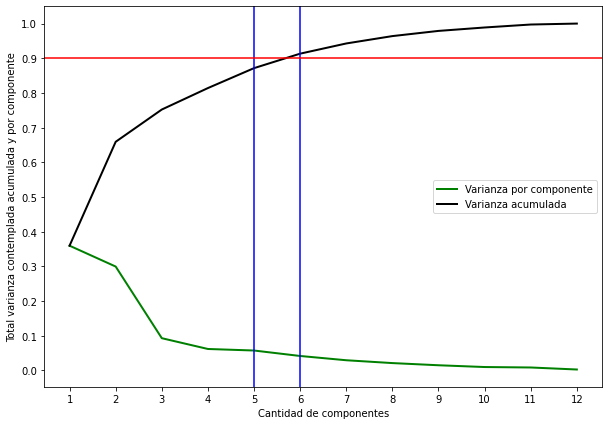

In [110]:
cant_features_cla = X_train_clasif_norm.shape[1]
pca_cla_2 = PCA(n_components=cant_features_cla, random_state=RANDOM_STATE).fit(X_train_clasif_norm)

plt.figure(figsize=(10,7))
plt.plot(pca_cla_2.explained_variance_ratio_, color='g', lw=2)
plt.plot(np.cumsum(pca_cla_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada acumulada y por componente')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0,cant_features_cla,1),np.arange(1,cant_features_cla+1,1))
plt.axvline(cant_componentes_cla-2, c='b')
plt.axvline(cant_componentes_cla-1, c='b')
plt.axhline(varianza_requerida, c='r')
plt.legend(['Varianza por componente', 'Varianza acumulada'],loc="center right")
plt.show();

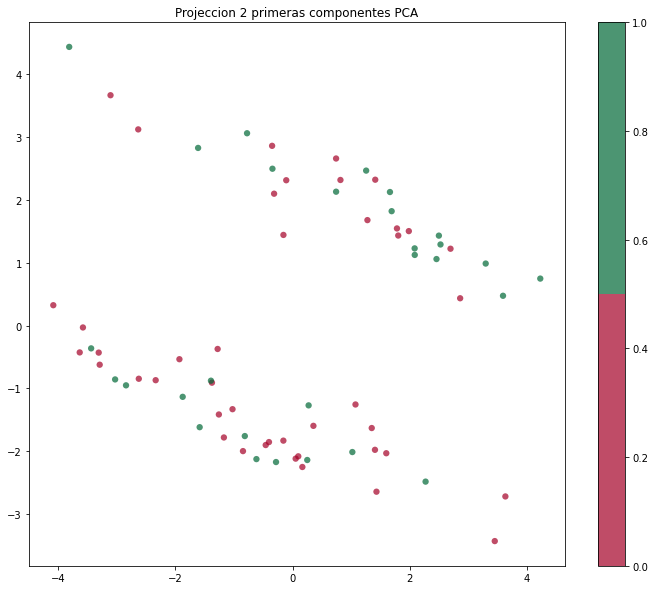

In [111]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))

plt.scatter(X_train_pca_clasif_norm[:, 0], X_train_pca_clasif_norm[:, 1], c=y_train_clasif, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('RdYlGn', 2))
plt.colorbar()

plt.title('Projeccion 2 primeras componentes PCA');

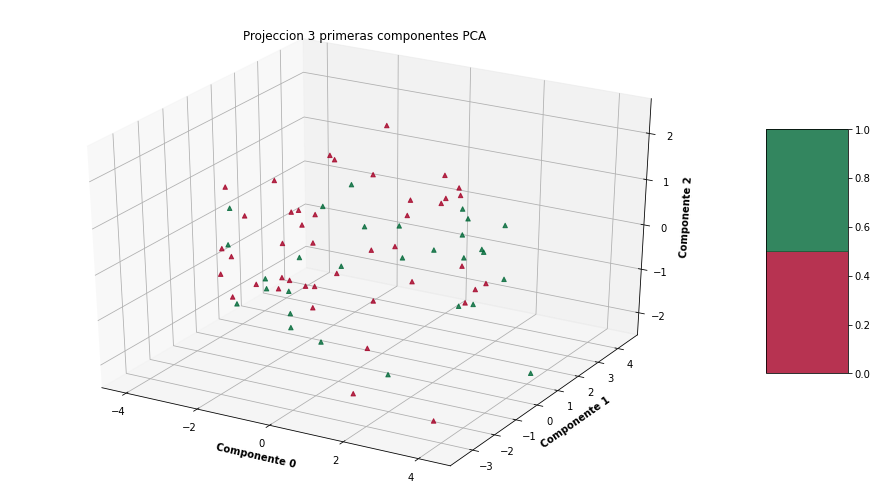

In [112]:
#Mostramos las primeras 3 componentes juntas
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('RdYlGn',2)
 
sctt = ax.scatter3D(X_train_pca_clasif_norm[:, 0], 
                    X_train_pca_clasif_norm[:, 1],
                    X_train_pca_clasif_norm[:, 2], 
                    alpha = 0.8,
                    c=y_train_clasif[:],
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Projeccion 3 primeras componentes PCA")
ax.set_xlabel('Componente 0', fontweight ='bold')
ax.set_ylabel('Componente 1', fontweight ='bold')
ax.set_zlabel('Componente 2', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 3)

## Regresion logistica

Vamos a aplicar regresion logistica con las componentes de PCA calculadas (90% varianza) y ver como se ajusta el modelo a nuestro dataset

### Hacemos el fit de nuestro modelo

In [113]:
from sklearn.linear_model import LogisticRegression

# Definimos nuestros hiperparámetros
epochs = 40000
bias = True

#utilizamos normalizacion l2
#logistic_regression=LogisticRegression(penalty='l2',fit_intercept=bias,intercept_scaling=1,solver="lbfgs",max_iter=epochs,multi_class="multinomial")
logistic_regression=LogisticRegression(penalty='l2',fit_intercept=bias,intercept_scaling=1,solver="liblinear",max_iter=epochs,multi_class="ovr")


In [114]:
logistic_regression.fit(X_train_pca_clasif_norm, y_train_clasif)

LogisticRegression(max_iter=40000, multi_class='ovr', solver='liblinear')

In [115]:
print("Coeficientes de la regresión: ",logistic_regression.coef_)
print("Intercept de la regresión: ",logistic_regression.intercept_)


Coeficientes de la regresión:  [[ 0.13865803  0.19842719 -0.54779573  0.62620521 -0.0167455  -0.58742232]]
Intercept de la regresión:  [-0.45820957]


In [116]:
slope = - (logistic_regression.coef_[0,0] / logistic_regression.coef_[0,1])
intercept = - (logistic_regression.intercept_[0] / logistic_regression.coef_[0,1])
print("\nPara graficar utilizamos como slope {} y como intercpet {}".format(slope,intercept))


Para graficar utilizamos como slope -0.6987854254198327 y como intercpet 2.3092075462556254


### Graficamos el limite de la decision para el primer componente

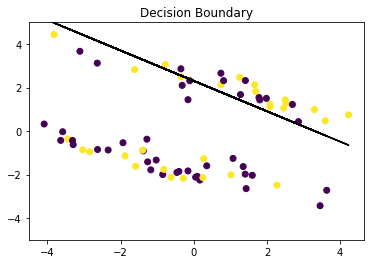

In [117]:
# Grafico para las primeras 2 componentes
plt.scatter(X_train_pca_clasif_norm[:, 0], X_train_pca_clasif_norm[:, 1], c=y_train_clasif[:])
y_vals = intercept + (slope * X_train_pca_clasif_norm[:, 0])
plt.plot(X_train_pca_clasif_norm[:, 0], y_vals, c="k")
plt.title('Decision Boundary')
plt.ylim((-5, 5))
plt.show()

### Hacemos el predict de nuestros datos de test y tomamos metricas

In [118]:
yhat_reg_log = logistic_regression.predict(X_test_pca_clasif_norm)

In [119]:
accuracy_reg_log = Accuracy(truth=y_test_clasif, prediction=yhat_reg_log)
precision_reg_log = Precision(truth=y_test_clasif, prediction=yhat_reg_log)
recall_reg_log = Recall(truth=y_test_clasif, prediction=yhat_reg_log)
print("Accuracy: ",accuracy_reg_log())
print("Precision: ",precision_reg_log())
print("Recall: ",recall_reg_log())


Accuracy:  0.65625
Precision:  0.6
Recall:  0.6428571428571429


### Ploteamos la confusion matrix para test

In [120]:
import itertools
def plotConfusionMatrix(conf_mtx, c):
    plt.figure(figsize=(6,6))
    plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(c)
    plt.xticks(tick_marks, np.arange(c) , rotation=45)
    plt.yticks(tick_marks, np.arange(c))

    fmt = '.2f'
    thresh = conf_mtx.max() / 2.

    for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
        plt.text(j, i, format(conf_mtx[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_mtx[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('Sexo real (femenino)')
        plt.xlabel('Sexo predecido')

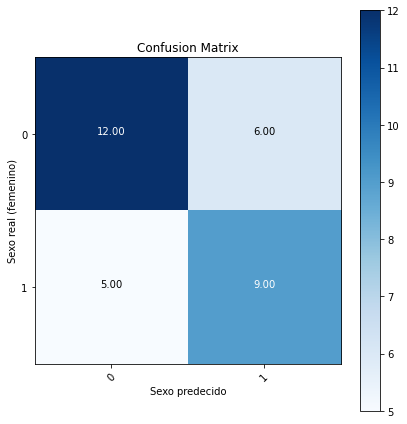

In [121]:
from sklearn.metrics import confusion_matrix
conf_mtx =confusion_matrix(y_test_clasif, yhat_reg_log)
plotConfusionMatrix(conf_mtx, 2)



### Conclusiones

Vemos que la prediccion obtenida no es buena. Esto puede verse inicialmente con la grafica de PCA donde se ve que las 2 o 3 componentes principales no muestran una separacion clara de los datos. Por lo tanto vamos a analizar cada una de las features del dataset para ver la distribucion de cada una de ellas contra nuestra variable de sex (female) para ver si podemos detectar componentes que nos sirvan para predecir 

### Analizamos las features de nuestro dataset contra la variable sex (female)

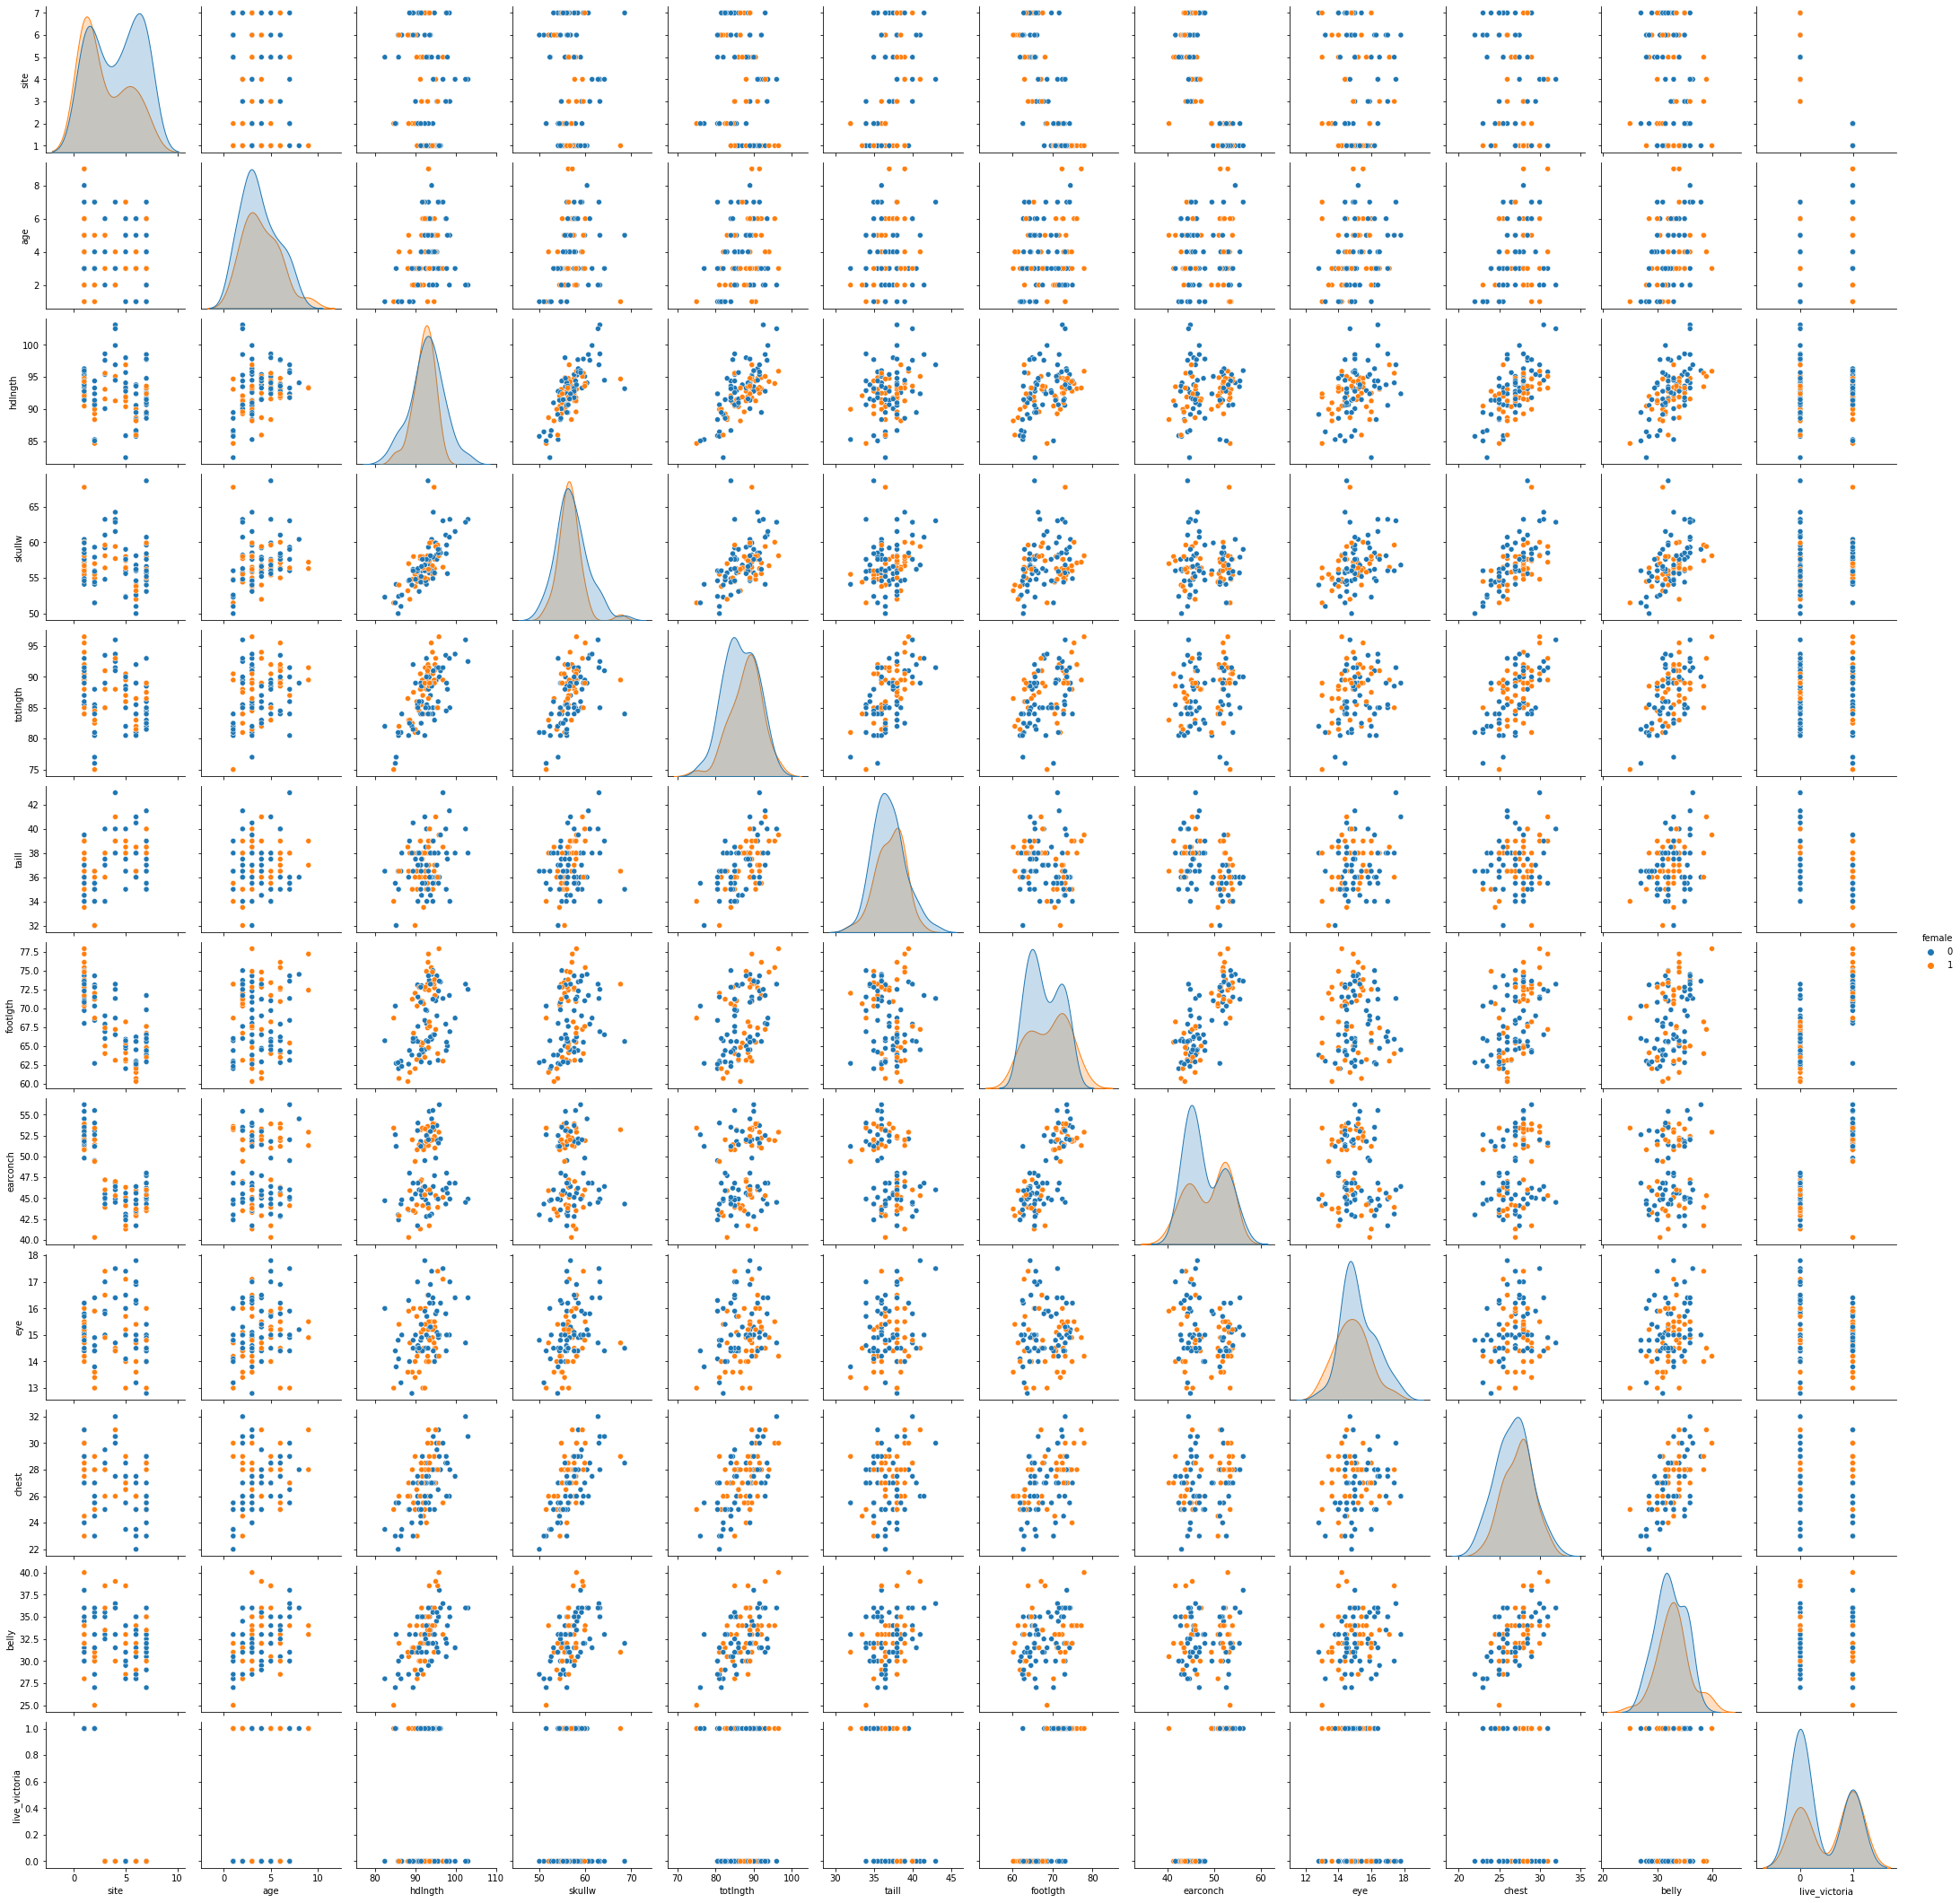

In [122]:
sns.pairplot(dataset, hue = 'female', diag_kind = 'kde')

De las distribuciones de cada feature contra sex (female) vemos que algunas tienen distribuciones similares para los 2 casos, con lo cual no nos dan mucha informacion. Las quitamos y nos quedamos con el resto para ver si obtenemos un mejor modelo

Probamos quitando las features hdlngth, skullw, taill, chest, belly y site

### Quitamos las columnas y obtenemos nuestros X e Y para test y train normalizados

In [123]:
splitXY_DS_2 = Split_X_Y(datasetNumpy_cols)
y_train_clasif_2 = splitXY_DS_2.filter_DS(train_set,"female")    
y_test_clasif_2 = splitXY_DS_2.filter_DS(test_set,"female")

cols_elim = ["hdlngth","skullw","chest","taill","site","belly","female"]
X_train_clasif_2 = splitXY_DS_2.remove_colums_DS(train_set,cols_elim)
X_test_clasif_2 = splitXY_DS_2.remove_colums_DS(test_set,cols_elim)

y_train_clasif_2 = y_train_clasif_2.astype(int)
y_test_clasif_2 = y_test_clasif_2.astype(int)

normalization_2 = Normalization()
X_train_clasif_2_norm = normalization_2.zcore_fit_transform(X_train_clasif_2)
X_test_clasif_2_norm = normalization_2.zcore_transform(X_test_clasif_2)

### Entrenamos nuestra regresion logistica contra las nuevas features restringidas

In [124]:
epochs = 4000
bias = True

#logistic_regression_2=LogisticRegression(penalty='l2',fit_intercept=bias,intercept_scaling=1,solver="lbfgs",max_iter=epochs,multi_class="multinomial")
logistic_regression_2=LogisticRegression(penalty='l2',fit_intercept=bias,intercept_scaling=1,solver="liblinear",max_iter=epochs,multi_class="ovr")
logistic_regression_2.fit(X_train_clasif_2_norm, y_train_clasif_2)

print("Coeficientes de la regresión: ",logistic_regression_2.coef_)
print("Intercept de la regresión: ",logistic_regression_2.intercept_)


Coeficientes de la regresión:  [[-0.02016859  0.73335173 -0.32790526 -0.51170184 -0.47803993  1.0154007 ]]
Intercept de la regresión:  [-0.421625]


### Hacemos el predict y vemos las metricas

Accuracy:  0.71875
Precision:  0.6666666666666666
Recall:  0.7142857142857143


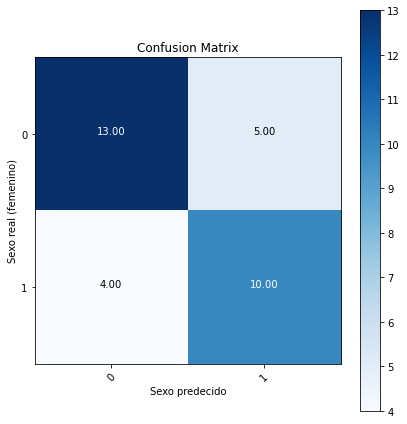

In [125]:
yhat_reg_log_2 = logistic_regression_2.predict(X_test_clasif_2_norm)

accuracy_reg_log_2 = Accuracy(truth=y_test_clasif_2, prediction=yhat_reg_log_2)
precision_reg_log_2 = Precision(truth=y_test_clasif_2, prediction=yhat_reg_log_2)
recall_reg_log_2 = Recall(truth=y_test_clasif_2, prediction=yhat_reg_log_2)
print("Accuracy: ",accuracy_reg_log_2())
print("Precision: ",precision_reg_log_2())
print("Recall: ",recall_reg_log_2())

conf_mtx =confusion_matrix(y_test_clasif_2, yhat_reg_log_2)
plotConfusionMatrix(conf_mtx, 2)

### Conclusiones

Nuestro nuevo modelo se comporta mucho mejor, logrando mejores resultados que aplicando PCA. Además, este es el modelo elegido para resolver nuestro problema, ya que es mejor que EM y KMeans, según lo que se podrá observar a continuación.

## Expectation Maximization

Se analizan resultados con este algoritmo de clasificación teniendo en cuenta dos casos: 

1) Todas las features en donde se aplicó PCA.

2) Seleccionando ciertas features observando su distribución (sin aplicar PCA).

Nota: en ambos casos los datos están normalizados.

In [126]:
from matplotlib.patches import Ellipse

In [127]:
def draw_ellipse(position, covariance, ax=None, **kwargs):

    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [128]:
def plot_gmm(gmm, X, label=True, ax=None):
    
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

    labels = gmm.fit(X).predict(X)

    probs = gmm.predict_proba(X)

    size = 50 * probs.max(1) ** 2
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=size, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_[:,0:2], gmm.covariances_[:,0:2,0:2], gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

### Caso 1: se genera el modelo, se fitea y predice.

In [129]:
from sklearn.mixture import GaussianMixture

In [130]:
RANDOM_STATE = 10
ITERATIONS = 100
CLUSTERS=2
gm = GaussianMixture(n_components=CLUSTERS, covariance_type='full',max_iter=ITERATIONS,random_state=RANDOM_STATE)

In [131]:
gm.fit(X_train_pca_clasif_norm)
labels_em=gm.predict(X_test_pca_clasif_norm)

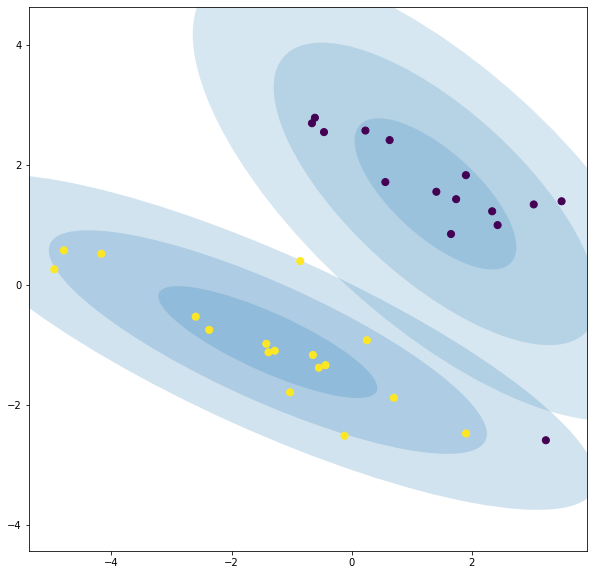

In [132]:
plot_gmm(gm, X_test_pca_clasif_norm)

### Caso 1: se calculan las métricas.

Accuracy:  0.5625
Precision:  0.5
Recall:  0.5


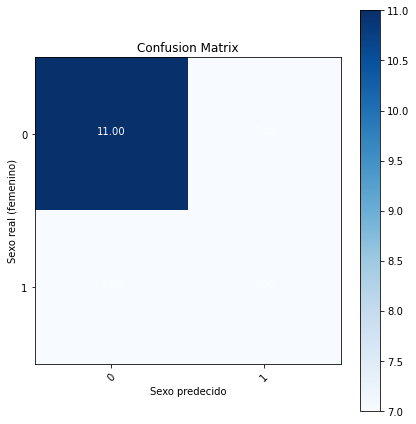

In [133]:
accuracy_EM = Accuracy(truth=y_test_clasif, prediction=labels_em)
precision_EM = Precision(truth=y_test_clasif, prediction=labels_em)
recall_EM = Recall(truth=y_test_clasif, prediction=labels_em)
print("Accuracy: ",accuracy_EM())
print("Precision: ",precision_EM())
print("Recall: ",recall_EM())

conf_mtx_EM =confusion_matrix(y_test_clasif,labels_em)
plotConfusionMatrix(conf_mtx_EM, 2)

### Caso 1: conclusiones

En este caso, las métricas no son buenas. Se procede a analizar el caso 2.

### Caso 2: se genera el modelo, se fitea y predice.

Se sacan aquellas features en donde la distribución es similar para masculino y femenino.

In [134]:
splitXY_DS_3 = Split_X_Y(datasetNumpy_cols)
y_train_clasif_3 = splitXY_DS_3.filter_DS(train_set,"female")    
y_test_clasif_3 = splitXY_DS_3.filter_DS(test_set,"female")

cols_elim = ["hdlngth","taill","belly","earconch","skullw","female"]

X_train_clasif_3 = splitXY_DS_3.remove_colums_DS(train_set,cols_elim)
X_test_clasif_3 = splitXY_DS_3.remove_colums_DS(test_set,cols_elim)

y_train_clasif_3 = y_train_clasif_3.astype(int)
y_test_clasif_3 = y_test_clasif_3.astype(int)

normalization_3 = Normalization()
X_train_clasif_3_norm = normalization_3.zcore_fit_transform(X_train_clasif_3)
X_test_clasif_3_norm = normalization_3.zcore_transform(X_test_clasif_3)

In [135]:
gm_3 = GaussianMixture(n_components=CLUSTERS, covariance_type='full',max_iter=ITERATIONS,random_state=RANDOM_STATE)
gm_3.fit(X_train_clasif_3_norm)
labels_em_3=gm_3.predict(X_test_clasif_3_norm)

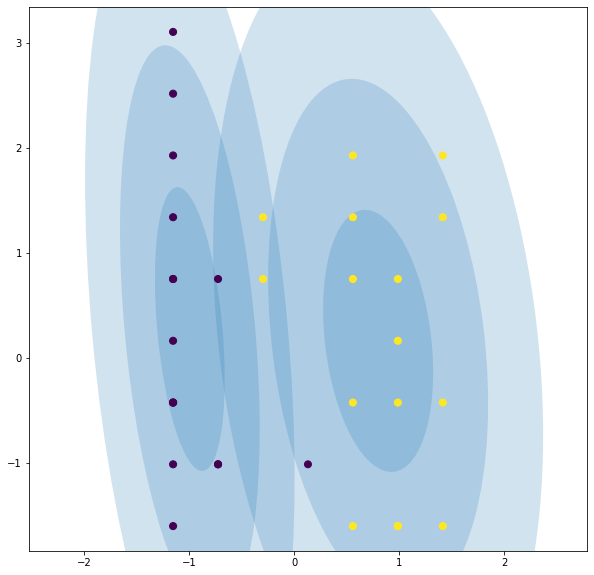

In [136]:
plot_gmm(gm_3, X_test_clasif_3_norm)

### Caso 2: se calculan las métricas

Accuracy:  0.59375
Precision:  0.5333333333333333
Recall:  0.5714285714285714


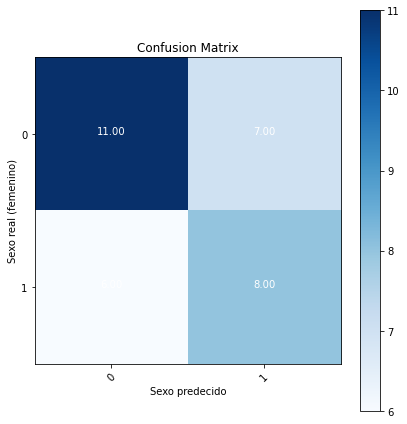

In [137]:
accuracy_EM_3 = Accuracy(truth=y_test_clasif_3, prediction=labels_em_3)
precision_EM_3 = Precision(truth=y_test_clasif_3, prediction=labels_em_3)
recall_EM_3 = Recall(truth=y_test_clasif_3, prediction=labels_em_3)
print("Accuracy: ",accuracy_EM_3())
print("Precision: ",precision_EM_3())
print("Recall: ",recall_EM_3())

conf_mtx_EM_3 =confusion_matrix(y_test_clasif_3,labels_em_3)
plotConfusionMatrix(conf_mtx_EM_3, 2)

### Caso 2: conclusiones

Este modelo predice mejor que el caso anterior, ya que se hizo un tratamiento especial sobre las features, elegiéndolas según su distribución. Sin embargo, las métricas no son buenas, por lo tanto nos quedamos con regresión logística para trabajar este problema.

##KMeans

Se analizan resultados con este algoritmo de clasificación teniendo en cuenta dos casos: 

1) Todas las features en donde se aplicó PCA.

2) Seleccionando ciertas features observando su distribución (sin aplicar PCA).

Nota: en ambos casos los datos están normalizados.

###Caso 1: se genera el modelo, se fitea y predice.

In [138]:
from sklearn.cluster import KMeans
RANDOM_STATE = 10
ITERATIONS = 100
CLUSTERS=2
kmeans = KMeans(n_clusters=CLUSTERS, n_init=ITERATIONS, random_state=RANDOM_STATE)
kmeans.fit(X_train_pca_clasif_norm)
cluster_labels = kmeans.labels_
# print("Las etiquetas luego de aplicar fit en KMeans son:",cluster_labels)
labels=kmeans.predict(X_test_pca_clasif_norm)
# print("Las etiquetas luego de aplicar predict en KMeans son:",labels)

###Caso 1: se calculan las métricas.

Accuracy:  0.5625
Precision:  0.5
Recall:  0.5


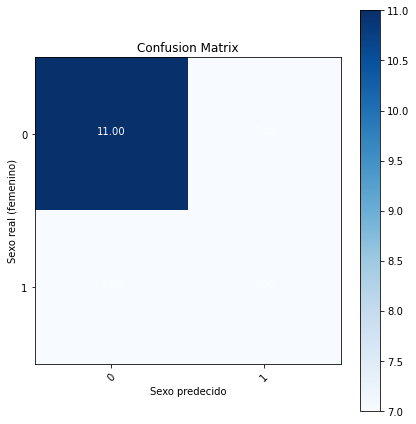

In [139]:
accuracy_KMeans = Accuracy(truth=y_test_clasif, prediction=labels)
precision_KMeans = Precision(truth=y_test_clasif, prediction=labels)
recall_KMeans = Recall(truth=y_test_clasif, prediction=labels)
print("Accuracy: ",accuracy_KMeans())
print("Precision: ",precision_KMeans())
print("Recall: ",recall_KMeans())

conf_mtx_KMeans =confusion_matrix(y_test_clasif,labels)
plotConfusionMatrix(conf_mtx_KMeans, 2)

### Caso 1: conclusiones

En este caso, las métricas no son buenas, no obstante son mejores que en el caso 1 de EM. Se procede a analizar el caso 2.

### Caso 2: se genera el modelo, se fitea y predice.

Se sacan aquellas features en donde la distribución es similar para masculino y femenino.

In [140]:
kmeans_2 = KMeans(n_clusters=CLUSTERS, n_init=ITERATIONS, random_state=RANDOM_STATE)
kmeans_2.fit(X_train_clasif_3_norm)
cluster_labels_2 = kmeans_2.labels_
#print("Las etiquetas luego de aplicar fit en KMeans son:",cluster_labels_2)
labels_2=kmeans_2.predict(X_test_clasif_3_norm)
#print("Las etiquetas luego de aplicar predict en KMeans son:",labels_2)

###Caso 2: se calculan las métricas.

Accuracy:  0.40625
Precision:  0.35294117647058826
Recall:  0.42857142857142855


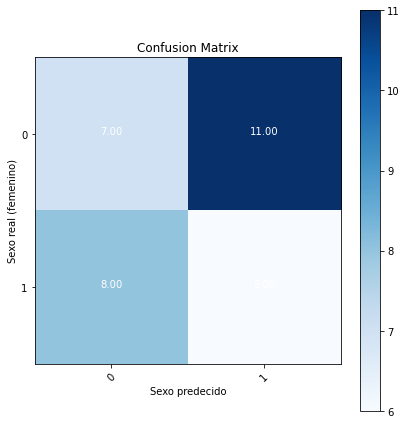

In [141]:
accuracy_KMeans_2 = Accuracy(truth=y_test_clasif_3, prediction=labels_2)
precision_KMeans_2 = Precision(truth=y_test_clasif_3, prediction=labels_2)
recall_KMeans_2 = Recall(truth=y_test_clasif_3, prediction=labels_2)
print("Accuracy: ",accuracy_KMeans_2())
print("Precision: ",precision_KMeans_2())
print("Recall: ",recall_KMeans_2())

conf_mtx_KMeans =confusion_matrix(y_test_clasif_3,labels_2)
plotConfusionMatrix(conf_mtx_KMeans, 2)

### Caso 2: conclusiones

En este caso dieron un poco mejor las metricas, asemejándose al caso 2 de GMM.

### Anexo: Gráfico sobre inercia para obtener el número óptimo de clusters

Nótese la bajada abrupta en el cluster 2 que estamos analizando.

Text(0.5, 1.0, 'Inercia')

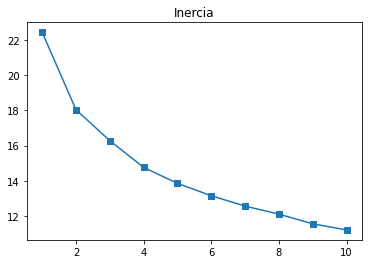

In [142]:
inertia = []
for k in range(1, 11):
    kmeans_3 = KMeans(n_clusters=k, n_init=ITERATIONS, random_state=RANDOM_STATE).fit(X_train_clasif_3_norm)
    inertia.append(np.sqrt(kmeans_3.inertia_))
    #k es la cantidad de clusters que va de 1 a 2 (se sabe a priori que son 2 cluster). Para cada k calcula la inercia.
    # print ("Inercia:",inertia)

plt.plot(range(1, 11), inertia, marker='s')
#marker determina la forma en la que se dibuja el punto en el gráfico (s son cuadrados, o son óvalos).
plt.title('Inercia')

### Comparación de los modelos

A continuación se muestran los resultados obtenidos en cada caso, comparando los modelos y sus métricas:

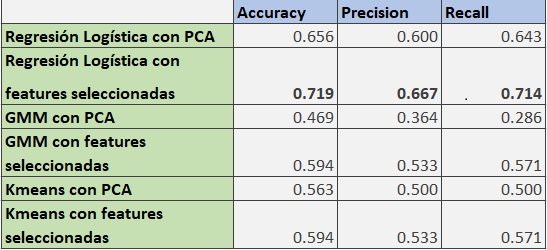

Es lógico que regresión logística sea el modelo que mejor clasifica en femenino y masculino, ya que se está utilizando el sexo como variable target. En cambio, en los otros dos modelos, solo podemos indicar que utilice dos clases, y es el algoritmo quien resuelve la mejor clasificación, por lo que son utilizados en general con el objetivo de encontrar patrones. 

#Modelos de regresion

## Objetivo

En este ejercicio vamos a predecir totlngth. Se emplearán métodos lineales. Implica realizar una aproximación lineal por cada componente principal derivada del cálculo de PCA.

## Separamos el X e Y de nuestros datos de test y train

In [143]:
splitXY_reg_DS = Split_X_Y(datasetNumpy_cols)

X_train_reg,y_train_reg = splitXY_reg_DS.split_DS(train_set,"totlngth")
X_test_reg,y_test_reg = splitXY_reg_DS.split_DS(test_set,"totlngth")

## Normalizamos los datos de las features

In [144]:
normalization = Normalization()
X_train_reg_norm = normalization.zcore_fit_transform(X_train_reg)
X_test_reg_norm = normalization.zcore_transform(X_test_reg)

## Aplicamos PCA

In [145]:
varianza_requerida = 0.9
pca_reg = PCA(n_components=varianza_requerida, random_state=RANDOM_STATE).fit(X_train_reg_norm)
X_train_pca_reg_norm = pca_reg.transform(X_train_reg_norm) #Solo tranform, fit hecho en linea anterior
X_test_pca_reg_norm = pca_reg.transform(X_test_reg_norm)

In [146]:
cant_componentes_reg = X_train_pca_reg_norm.shape[1]
print("Varianza por componente: ",pca_reg.explained_variance_ratio_)
print("Varianza acumulada por componente: ",np.cumsum(pca_reg.explained_variance_ratio_))

Varianza por componente:  [0.32886932 0.28127683 0.10174717 0.07632942 0.05498149 0.04999461
 0.03832717]
Varianza acumulada por componente:  [0.32886932 0.61014616 0.71189333 0.78822275 0.84320423 0.89319885
 0.93152601]




## Cálculo y gráficos
Se aplicaron tres modelos de regresión lineal:
1. Recta con único peso (su pendiente): $$\hat{y} = w.X$$
1. Recta con pendiente y ordenada al origen como pesos: $$\hat{y} = w.X + b_0$$
1. Constante: $$\hat{y} = w$$ 

Como por PCA se calculan las componentes principales, se realiza una regresión lineal por cada una de las features que sobrevivieron y se calcula el error cuadrático medio (MSE) correspondiente. 


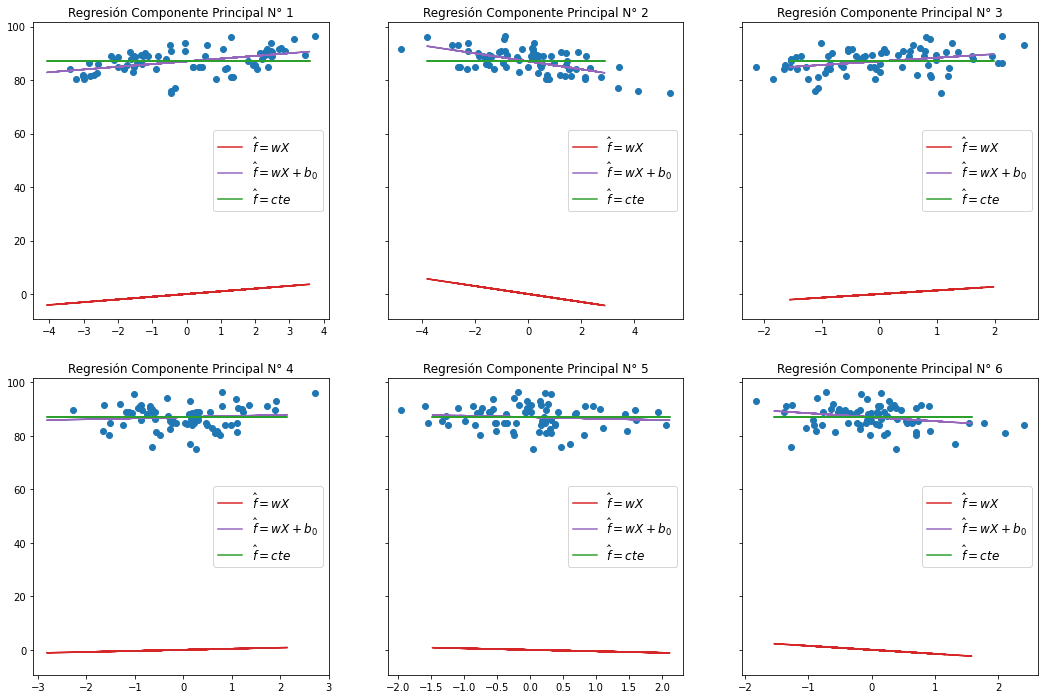

In [147]:
#Declaramos el array que acumula las regresiones
regresiones = []
regresiones_b = []
regresiones_c = []

#Declaramos el array donde se acumularán los R2
lr_r2 = []
lr_r2_b = []
lr_r2_c = []

#Declaramos el array donde se acumularán los MSE
lr_mse = []
lr_mse_b = []
lr_mse_c = []

#Creacion del objeto del R2
r2 = Rtwo()
r2_b = Rtwo()
r2_c = Rtwo()

#Creacion del objeto del error cuadrático medio 
mse = MSELineal()
mse_b = MSELineal()
mse_c = MSELineal()

#Elementos para graficar
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(18, 12))

#Contadores
g = 0 
cnt = 1

#Se recorre cada columna del set de muestras de entrenamiento.
'''
Se efectúa cada método de regresión lineal para las primeras 6 
componentes calculadas con PCA. Los resultados se acumulan para 
generar una matriz de 2x3 subgráficos. Cada uno de ellos, posee 
las rectas de regresión que le corresponde.
'''
for i in range(2):
    for j in range(3):
        #Creacion del objeto de de regresión lineal con ordenada al 
        #origen nulo
        linear_regression = LinearRegression()
        #Fit regresión
        linear_regression.fit(X_train_pca_reg_norm[:,g], y_train_reg)
        #Recta de regresión
        lr_y_hat = linear_regression.predict(X_test_pca_reg_norm[:,g])
        regresiones.append([yhat for yhat in lr_y_hat])
        reg = np.asarray(regresiones)
        #R2
        lr_r2.append(r2(y_test_reg, lr_y_hat))
        #Error cuadrático medio
        lr_mse.append(mse(y_test_reg, lr_y_hat))

        #Creacion del objeto de de regresión lineal con ordenada al 
        #origen b
        linear_regression_b = LinearRegressionWithB()
        #Fit regresión
        linear_regression_b.fit(X_train_pca_reg_norm[:,g], y_train_reg)
        #Recta de regresión
        lr_y_hat_b = linear_regression_b.predict(X_test_pca_reg_norm[:,g])
        regresiones_b.append([yhat for yhat in lr_y_hat_b])
        reg_b = np.asarray(regresiones_b)
        #R2
        lr_r2_b.append(r2_b(y_test_reg, lr_y_hat_b))
        #Error cuadrático medio
        lr_mse_b.append(mse_b(y_test_reg, lr_y_hat_b))

        #Creacion del objeto de de regresión lineal constante
        linear_regression_c = ConstantModel()
        #Fit regresión
        linear_regression_c.fit(X_train_pca_reg_norm[:,g], y_train_reg)
        #Recta de regresión
        lr_y_hat_c = linear_regression_c.predict(X_test_pca_reg_norm[:,g])
        regresiones_c.append([yhat for yhat in lr_y_hat_c])
        reg_c = np.asarray(regresiones_c)
        #R2
        lr_r2_c.append(r2_c(y_test_reg, lr_y_hat_c))
        #Error cuadrático medio
        lr_mse_c.append(mse_c(y_test_reg, lr_y_hat_c))

        #Ploteo de cada regresión
        axs[i, j].plot(X_test_pca_reg_norm[:,g],reg[g], color='tab:red')
        axs[i, j].plot(X_test_pca_reg_norm[:,g],reg_b[g], color='tab:purple')
        axs[i, j].plot(X_test_pca_reg_norm[:,g],reg_c[g], color='tab:green')
        axs[i, j].title.set_text('Regresión Componente Principal N° {}'.format(cnt))
        axs[i, j].legend([r'$\hat{f}=wX$', r'$\hat{f}=wX+b_0$', r'$\hat{f}=cte$'],fontsize=12, loc='center right')
        axs[i, j].scatter(X_train_pca_reg_norm[:,g],y_train_reg)
        g+=1
        cnt+=1

## Métricas

### Cálculo de R2
R2 es la métrica que da cuenta de la performance de cada tipo de regresión empleada, junto con la componente principal considerada para su cálculo

In [148]:
#Cuadro comparativo de R2 
#Armamos los nombres de columna para el dataframe que almacena los parámetros
col = ['w.X', 'w.X + b_0', 'Constante']
#Armamos indíces para el dataframe
ind = ['CP %d'%(i+1) for i in range(g)]

data_r2 = [lr_r2, lr_r2_b, lr_r2_c]
df_r2 = pd.DataFrame(data_r2).transpose()
df_r2.columns = col
df_r2.index = ind
df_r2 = pd.DataFrame(df_r2, index=ind, columns=col)
df_r2

,w.X,w.X + b_0,Constante
CP 1,-551.957542,0.351548,-0.004752
CP 2,-557.330839,0.239119,-0.004752
CP 3,-551.454964,-0.244036,-0.004752
CP 4,-553.599341,-0.032467,-0.004752
CP 5,-554.383268,-0.074364,-0.004752
CP 6,-552.369623,-0.074340,-0.004752


### Visualización de resultados MSE

In [149]:
#Cuadro comparativo MSE
data_mse = [lr_mse, lr_mse_b, lr_mse_c]
df_mse = pd.DataFrame(data_mse).transpose()
df_mse.columns = col
df_mse.index = ind
df_mse = pd.DataFrame(df_mse, index=ind, columns=col)
df_mse

,w.X,w.X + b_0,Constante
CP 1,7620.311125,8.936315,13.846492
CP 2,7694.360558,10.485704,13.846492
CP 3,7613.385095,17.144061,13.846492
CP 4,7642.936765,14.228437,13.846492
CP 5,7653.740065,14.805816,13.846492
CP 6,7625.990013,14.805486,13.846492


### Gráfico del error cuadrático medio

Este gráfico resulta interesante para visualizar como se comporta el 
error en el entorno de la recta de regresión. Se lo hará para el mejor
caso obtenido: la recta de regresión con ordenada al origen $b_0$ de
la primer componente principal.

In [150]:
#Creamos la función que 
def ECM_graph(X,y,w):
    ecm=0.0
    for n,val in enumerate(y):
        y_est = w[0] + w[1]*X[n]
        ecm = ecm + (y_est - y[n])**2
    return ecm/len(y)

In [151]:
# Armamos una grilla con un rango de valores de los pesos
b0 = np.arange(-150,400,10)
w = np.arange(-150,150,1)

X0, Y0 = np.meshgrid(b0, w)

In [152]:
# Calculamos el ECM para todos los posibles valores de w del rango elegido
Z = ECM_graph(X_train_pca_reg_norm[:,0],y_train_reg,[X0,Y0])

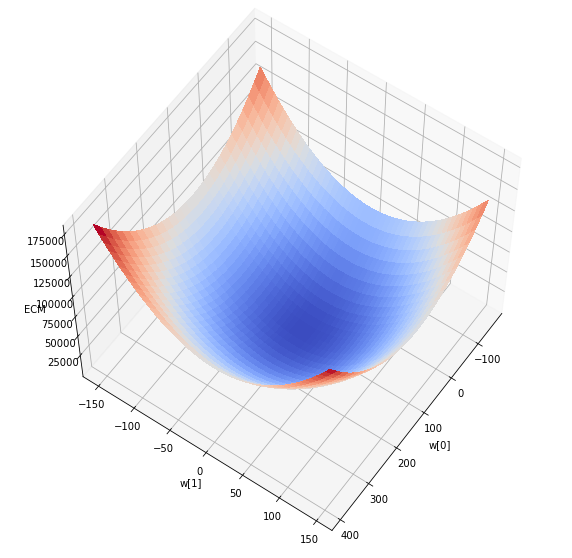

In [153]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('ECM')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.view_init(60, 35)

## Conclusión
Como era de esperar, a las luz de los resultados de R2 y MSE, el mejor ajuste se obtuvo con el modelo de regresión lineal con pesos $w$ y $b_0$ aplicado a la primer componente principal. 
Sin embargo, en cuanto a la performance para ser utilizado como modelo de predicción, no resulta adecuado.